# 数値解析第8回課題

### 学籍番号：08B22182　氏名：平山聖輝

課題8

データ点

$$
(x_i, y_i)=(-1.0,0.0), (0.0, 2.0), (1.0, 1.0), (2.0, 3.0), (3.0, 5.0), (4.0, 4.0)
$$

に対し，
* 関数 $ y = ax + b $ にて最小二乗近似したときの， $ a $ および $ b $ を求めよ．
* 相関係数を求めよ．

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt

### データを準備する

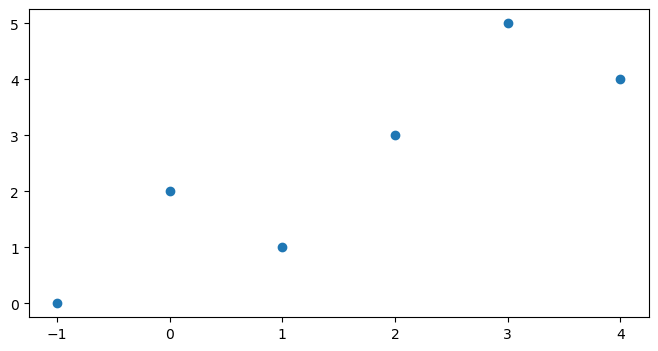

In [40]:
#データをdata配列に格納
data = [
    [-1.0, 0.0],
    [0.0, 2.0],
    [1.0, 1.0],
    [2.0, 3.0],
    [3.0, 5.0],
    [4.0, 4.0]
]
#データは6つ
data_size = 6

#x,y配列を生成
x = np.zeros(6)
y = np.zeros(6)
#x,yにデータの値を代入
for i in range(data_size):
    x[i] = data[i][0]
    y[i] = data[i][1]

#pltする
plt.figure(figsize = (8, 4))
plt.scatter(x, y)

### 近似直線を求める

講義内でもあったように，最小二乗法を用いた近似直線の係数 $ a $ と切片 $ b $ は以下のように求められる．

$$
a = \frac{m\sum{x_iy_i}-\sum{x_i}\sum{y_i}}{m\sum{x_i^2}-{(\sum{x_i})}^2}
$$
$$
b = \frac{\sum{x_i}\sum{x_iy_i}-\sum{x_i^2}\sum{y_i}}{(\sum{x_i})^2-m\sum{x_i^2}}
$$

In [58]:
#sumの塊を先に計算する
sum_x = 0.
sum_y = 0.
sum_xy = 0.
sum_x2 = 0.

for i in range(data_size):
    sum_x = sum_x + x[i]
    sum_y = sum_y + y[i]
    sum_xy = sum_xy + x[i]*y[i]
    sum_x2 = sum_x2 + x[i]**2

print('sum_x=', sum_x, '\n')
print('sum_y=', sum_y, '\n')
print('sum_xy=', sum_xy, '\n')
print('sum_x2=', sum_x2, '\n')

#aとbを計算
a = (data_size*sum_xy - sum_x*sum_y)/(data_size*sum_x2 - (sum_x**2))
b = (sum_x*sum_xy - sum_x2*sum_y)/((sum_x**2) - data_size*sum_x2)

print('a=', a, '\n', 'b=', b)

sum_x= 9.0 

sum_y= 15.0 

sum_xy= 38.0 

sum_x2= 31.0 

a= 0.8857142857142857 
 b= 1.1714285714285715


計算した $ a $ と $ b $ を用いて近似直線を描くと以下のようになる．

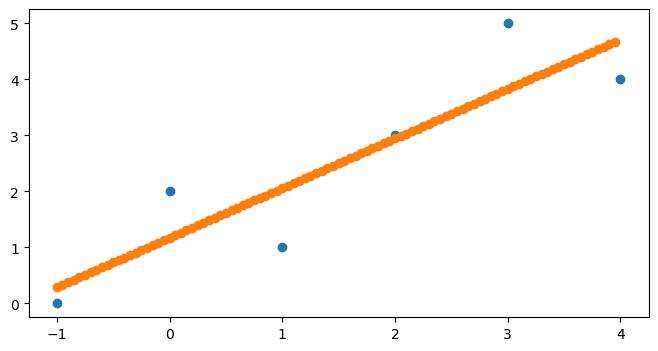

In [63]:
x1 = np.zeros(100)
y1 = np.zeros(100)

for i in range(-20, 80, 1):
    x1[i] = i*0.05
    y1[i] = a*x1[i] + b


plt.figure(figsize = (8, 4))
plt.scatter(x, y)
plt.scatter(x1, y1)

よって近似直線の係数 $ a $ と切片 $ b $ は以下．

$$
a = 0.8857142857142857,  b = 1.1714285714285715
$$

### 相関係数を計算する

相関係数は以下の式で計算できる．

$$
r_{xy} = \frac{s_{xy}}{s_xs_y} = \frac{\sum{(\overline{x} - x_i)(\overline{y} - y_i)}}{\sqrt{\sum{(\overline{x} - x_i)^2}}\sqrt{\sum{(\overline{y} - y_i)^2}}} 
$$

In [69]:
x_ave = np.average(x)
y_ave = np.average(y)

#近似直線同様に先にsumの塊を計算する
sum_xaya = 0
sum_xa = 0
sum_ya = 0

for i in range(data_size):
    sum_xaya = sum_xaya + (x_ave - x[i])*(y_ave - y[i])
    sum_xa = sum_xa + (x_ave - x[i])**2
    sum_ya = sum_ya + (y_ave - y[i])**2

print('sum_xaya=', sum_xaya, '\n')
print('sum_xa=', sum_xa, '\n')
print('sum_ya=', sum_ya, '\n')

r_xy = sum_xaya / (np.sqrt(sum_xa)*np.sqrt(sum_ya))

print('r_xy=' , r_xy)

sum_xaya= 15.5 

sum_xa= 17.5 

sum_ya= 17.5 

r_xy= 0.8857142857142857


近似直線と散布図を見るとわかるように相関は1に近い値になることが予想されるので正しい値だと予想できる．ライブラリにて確認すると

In [72]:
np.corrcoef(x,y)[0,1]

0.8857142857142858

よって相関係数は以下．

$$
r_{xy} = 0.8857142857142858
$$